# One Way Anova Test

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

# Create a DataFrame with the data from the table
data = {
    'Wavelength': [1550, 1064, 980, 810],
    'Cochlear': [1.11E-04, 3.07E-02, 1.57E-02, 8.05E-03],
    'Intranasal': [2.78E-11, 9.76E-05, 1.09E-05, 7.14E-06],
    '45 Degree': [5.21E-16, 5.26E-07, 3.92E-08, 1.74E-08],
    'CZ': [4.52E-20, 3.22E-09, 1.46E-10, 2.56E-11]
}

df = pd.DataFrame(data)

# Perform ANOVA test
result = f_oneway(
    df['Cochlear'],
    df['Intranasal'],
    df['45 Degree'],
    df['CZ']
)

print(result)


F_onewayResult(statistic=4.3752424553450195, pvalue=0.02671612532446915)


# Two Way Anova

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create the DataFrame with the given data
data = {
    'Wavelength': np.tile([1550, 1064, 980, 810], 4),
    # 'Cochlear': [1.11e-4, 3.07e-2, 1.57e-2, 8.05e-3],
    # 'Intranasal': [2.78e-11, 9.76e-5, 1.09e-5, 7.14e-6],
    # 'Degree': [5.21e-16, 5.26e-7, 3.92e-8, 1.74e-8],
    # 'CZ': [4.52e-20, 3.22e-9, 1.46e-10, 2.56e-11]
    'Position': ['cochlear','cochlear', 'cochlear', 'cochlear', 'intranasal', 'intranasal', 'intranasal', 'intranasal', 'degree', 'degree', 'degree', 'degree', 'cz', 'cz', 'cz', 'cz'],
    'AvgEnergy': [1.11e-4, 3.07e-2, 1.57e-2, 8.05e-3, 2.78e-11, 9.76e-5, 1.09e-5, 7.14e-6, 5.21e-16, 5.26e-7, 3.92e-8, 1.74e-8, 4.52e-20, 3.22e-9, 1.46e-10, 2.56e-11]
}

df = pd.DataFrame(data)

print (df)

# Perform the ANOVA test
model = ols('AvgEnergy ~ C(Wavelength) + C(Position) + C(Wavelength):C(Position)', data=df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)


    Wavelength    Position     AvgEnergy
0         1550    cochlear  1.110000e-04
1         1064    cochlear  3.070000e-02
2          980    cochlear  1.570000e-02
3          810    cochlear  8.050000e-03
4         1550  intranasal  2.780000e-11
5         1064  intranasal  9.760000e-05
6          980  intranasal  1.090000e-05
7          810  intranasal  7.140000e-06
8         1550      degree  5.210000e-16
9         1064      degree  5.260000e-07
10         980      degree  3.920000e-08
11         810      degree  1.740000e-08
12        1550          cz  4.520000e-20
13        1064          cz  3.220000e-09
14         980          cz  1.460000e-10
15         810          cz  2.560000e-11


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

N=int(4)
def newRound(value, N):
    exponent = np.ceil(np.log10(value))
    return 10**exponent*np.round(value*10**(-exponent), N)
print(np.repeat(['none', 'nylon','twine'], 9))
df = pd.DataFrame({'rifling': np.repeat(['none', 'nylon','twine'], 9),
                   'projectile': ['dart', 'dart', 'dart', 'tau', 'tau', 'tau', 'phi', 'phi', 'phi','dart', 'dart', 'dart', 'tau', 'tau', 'tau', 'phi', 'phi', 'phi','dart', 'dart', 'dart', 'tau', 'tau', 'tau', 'phi', 'phi', 'phi',],
                   'velocity': [43.5, 39.7, 41.1, 33.6, 29.8, 32.3, 21.1, 27.2, 28.4, 19.8, 23.6, 20.4, 5.5, 6.1, 7.7, 6.3, 7.2, 7.3, 20.8, 22.2, 24.6, 8.6, 7.7, 7.5, 5.2, 8.1, 7.6]})
print(df)

model = ols('velocity ~ C(rifling) + C(projectile) + C(rifling):C(projectile)', data=df).fit()
aa=sm.stats.anova_lm(model, typ=2)
print(aa)


['none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'none' 'nylon'
 'nylon' 'nylon' 'nylon' 'nylon' 'nylon' 'nylon' 'nylon' 'nylon' 'twine'
 'twine' 'twine' 'twine' 'twine' 'twine' 'twine' 'twine' 'twine']
   rifling projectile  velocity
0     none       dart      43.5
1     none       dart      39.7
2     none       dart      41.1
3     none        tau      33.6
4     none        tau      29.8
5     none        tau      32.3
6     none        phi      21.1
7     none        phi      27.2
8     none        phi      28.4
9    nylon       dart      19.8
10   nylon       dart      23.6
11   nylon       dart      20.4
12   nylon        tau       5.5
13   nylon        tau       6.1
14   nylon        tau       7.7
15   nylon        phi       6.3
16   nylon        phi       7.2
17   nylon        phi       7.3
18   twine       dart      20.8
19   twine       dart      22.2
20   twine       dart      24.6
21   twine        tau       8.6
22   twine        tau       7.7
23   twine        tau

#Power Comparision

Under the following assumptions:



*   The striatum is approximately 25-27cm inside the human head (half the diameter of the human head)
*   All measurements are assumed to be in the same axis of the striatum (cochlear)

For DBS, the distribution is given as current density (A/cm^2) based on the distance along the electrode (mm).

For TMS, the distribution is given as Volts per meter (V/m) based on the depth (cm).

For SWING's noninvasive solution, the results are given as Power (Amps) based on the depth (cm).



In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load and Process the Data
def load_and_process_data():
    data = {
        'Wavelength': [1550, 1064, 980, 810],
        'Cochlear': [1.11e-4, 3.07e-2, 1.57e-2, 8.05e-3],
        'Intranasal': [2.78e-11, 9.76e-5, 1.09e-5, 7.14e-6],
        'Degree': [5.21e-16, 5.26e-7, 3.92e-8, 1.74e-8],
        'CZ': [4.52e-20, 3.22e-9, 1.46e-10, 2.56e-11]
    }
    df = pd.DataFrame(data)
    return df

# Step 2: Create the First Graph - DBS Current Density
def plot_dbs_current_density(df):
    plt.figure(figsize=(8, 6))
    plt.plot(df['Wavelength'], df['Cochlear'], label='Cochlear')
    plt.plot(df['Wavelength'], df['Intranasal'], label='Intranasal')
    plt.plot(df['Wavelength'], df['Degree'], label='45 Degree')
    plt.plot(df['Wavelength'], df['CZ'], label='CZ')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Current Density')
    plt.title('DBS Current Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Create the Second Graph - TMS V/m per Depth
def plot_tms_v_per_depth(df):
    plt.figure(figsize=(8, 6))
    plt.plot(df['Wavelength'], df['Cochlear'], label='Cochlear')
    plt.plot(df['Wavelength'], df['Intranasal'], label='Intranasal')
    plt.plot(df['Wavelength'], df['Degree'], label='45 Degree')
    plt.plot(df['Wavelength'], df['CZ'], label='CZ')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('V/m per Depth')
    plt.title('TMS V/m per Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Create the Third Graph - Average Power per Depth
def plot_avg_power_per_depth(df):
    plt.figure(figsize=(8, 6))
    plt.plot(df['Wavelength'], df['Cochlear'], label='Cochlear')
    plt.plot(df['Wavelength'], df['Intranasal'], label='Intranasal')
    plt.plot(df['Wavelength'], df['Degree'], label='45 Degree')
    plt.plot(df['Wavelength'], df['CZ'], label='CZ')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Average Power per Depth')
    plt.title('Average Power per Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Create a Table for Comparison
def create_comparison_table(df):
    comparison_table = df.copy()
    # Add the reference max values from the papers to the comparison table
    # Replace the reference_max_dbs_current_density, reference_max_tms_v_per_m, etc. with the actual values.
    comparison_table['Reference Max Value'] = [reference_max_dbs_current_density, reference_max_tms_v_per_m, reference_max_avg_power]
    return comparison_table

# Step 6: Interpretation and Analysis
# Provide an interpretation and analysis of the graphs and the comparison table. Discuss any findings and implications.


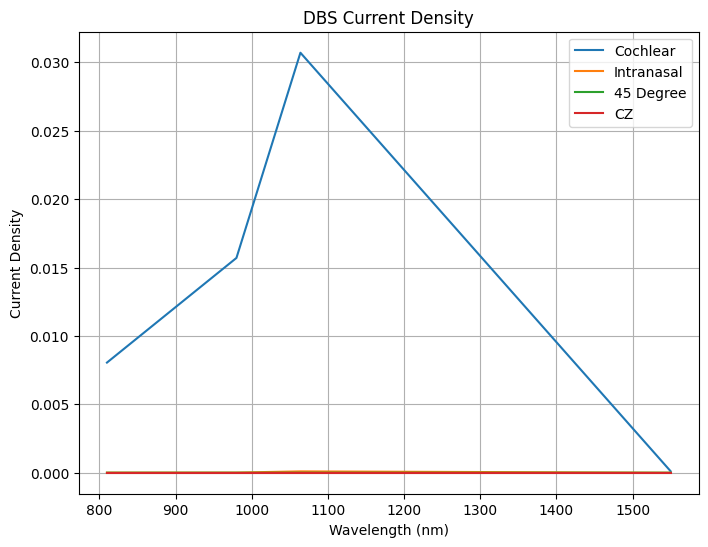

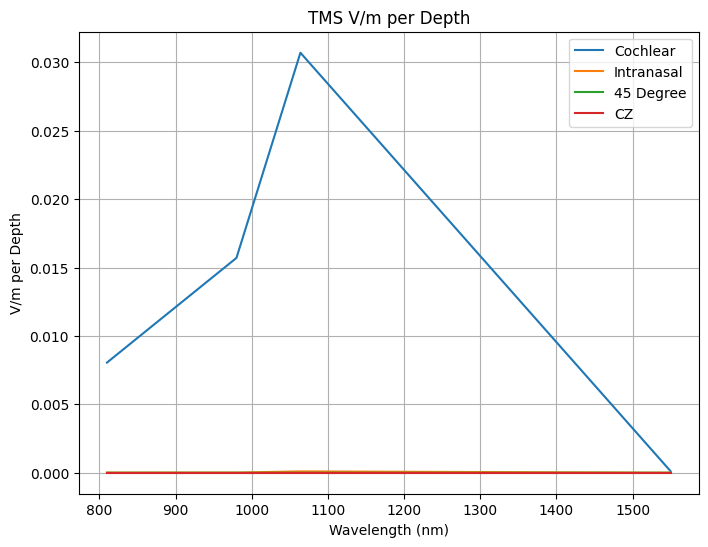

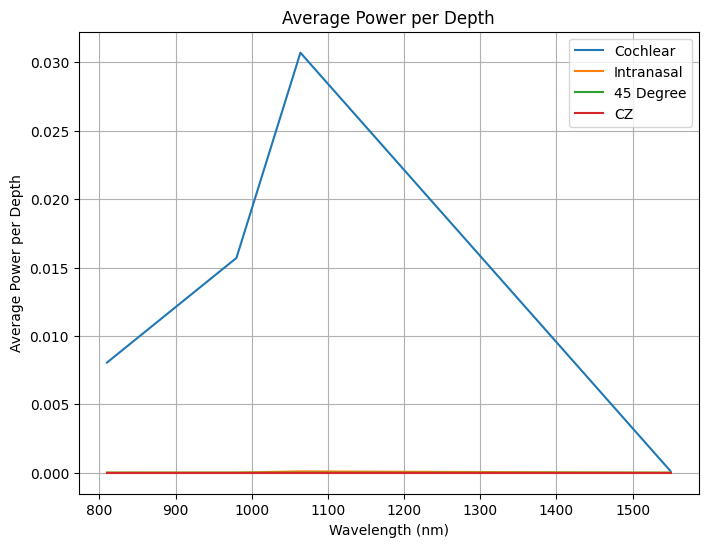

NameError: ignored

In [2]:
# Load and process the data
df = load_and_process_data()

# Step 2: Create the First Graph - DBS Current Density
plot_dbs_current_density(df)

# Step 3: Create the Second Graph - TMS V/m per Depth
plot_tms_v_per_depth(df)

# Step 4: Create the Third Graph - Average Power per Depth
plot_avg_power_per_depth(df)

# Step 5: Create a Table for Comparison
comparison_table = create_comparison_table(df)

# Step 6: Interpretation and Analysis
# Provide an interpretation and analysis of the graphs and the comparison table. Discuss any findings and implications.
